In [3]:
import pandas as pd

In [5]:
df=pd.read_csv("estadistical.csv")

In [7]:
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Receive/ Not receive credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [9]:
df.shape

(1000, 21)

In [11]:
df.isna().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [13]:
df.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Receive/ Not receive credit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [15]:
print(df.describe(include=['object']))

       Status of existing checking account Credit history Purpose  \
count                                 1000           1000    1000   
unique                                   4              5      10   
top                                    A14            A32     A43   
freq                                   394            530     280   

       Savings account/bonds Present employment since Personal status and sex  \
count                   1000                     1000                    1000   
unique                     5                        5                       4   
top                      A61                      A73                     A93   
freq                     603                      339                     548   

       Other debtors / guarantors Property Other installment plans  Housing  \
count                        1000     1000                     1000    1000   
unique                          3        4                        3       3   
top        

In [17]:
df.duplicated().sum()

0

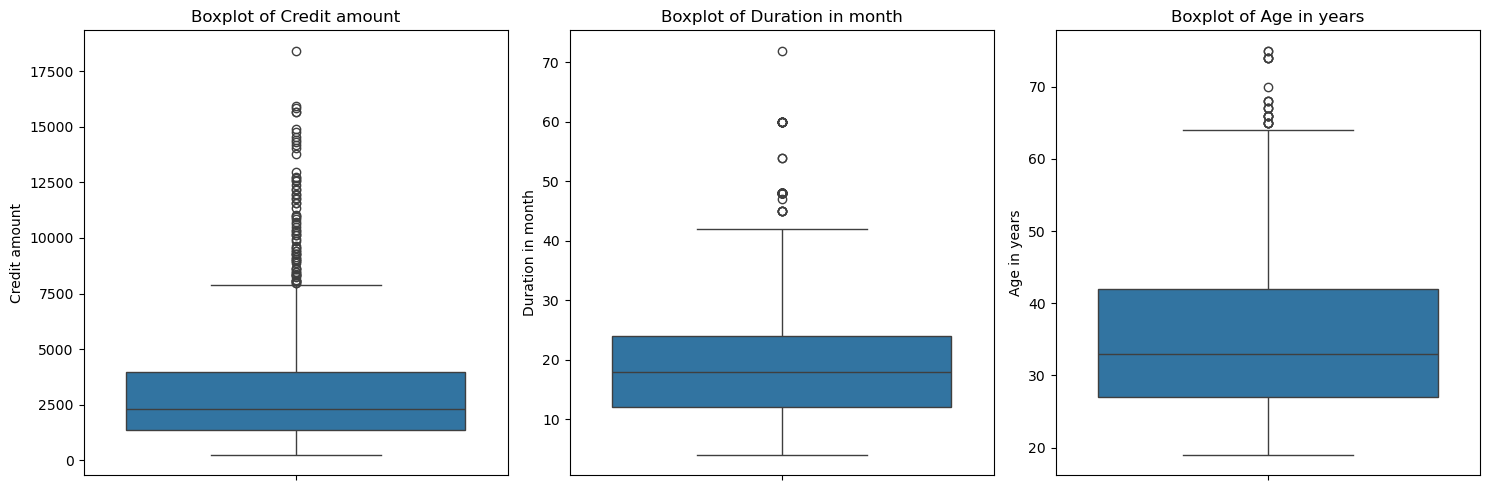

In [19]:
#checking outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier detection
numerical_columns = ['Credit amount', 'Duration in month', 'Age in years']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [20]:
#IQR
# Function to detect outliers based on IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply the IQR method to each numerical column
for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in Credit amount:
    Status of existing checking account  Duration in month Credit history  \
5                                   A14                 36            A32   
17                                  A11                 30            A30   
18                                  A12                 24            A32   
57                                  A14                 36            A34   
63                                  A12                 48            A30   
..                                  ...                ...            ...   
927                                 A11                 48            A32   
945                                 A12                 48            A30   
953                                 A14                 36            A32   
980                                 A12                 30            A34   
983                                 A11                 36            A32   

    Purpose  Credit amount Savings account/bonds

In [21]:
import pandas as pd

def remove_outliers_iqr(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        # Calculate the IQR
        IQR = Q3 - Q1
        # Determine outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out the outliers and update the main dataframe
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# List of numerical columns for which you want to remove outliers
numerical_columns = ['Credit amount', 'Duration in month', 'Age in years']

# Remove outliers from the main DataFrame
df = remove_outliers_iqr(df, numerical_columns)

# Show the shape of the updated DataFrame
print("Updated DataFrame shape:", df.shape)


Updated DataFrame shape: (862, 21)


In [22]:
df.shape

(862, 21)

In [23]:
df.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Receive/ Not receive credit
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,18.116009,2531.432715,3.017401,2.823666,34.698376,1.397912,1.153132,1.264501
std,8.690069,1663.627810,1.107853,1.103893,10.264763,0.564654,0.360324,0.441323
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1308.250000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2066.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3355.000000,4.000000,4.000000,41.000000,2.000000,1.000000,2.000000
max,42.000000,7882.000000,4.000000,4.000000,64.000000,4.000000,2.000000,2.000000


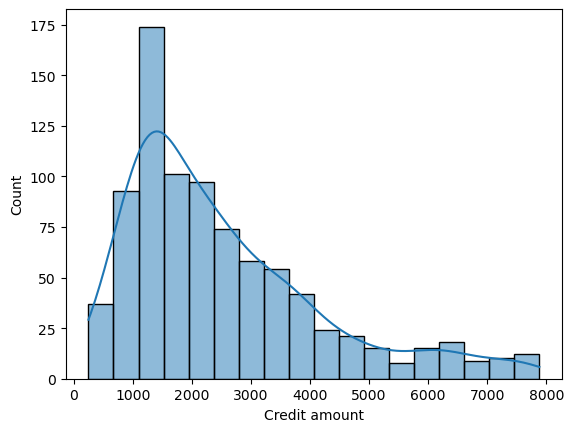

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of Credit Amount
sns.histplot(df['Credit amount'], kde=True)
plt.show()

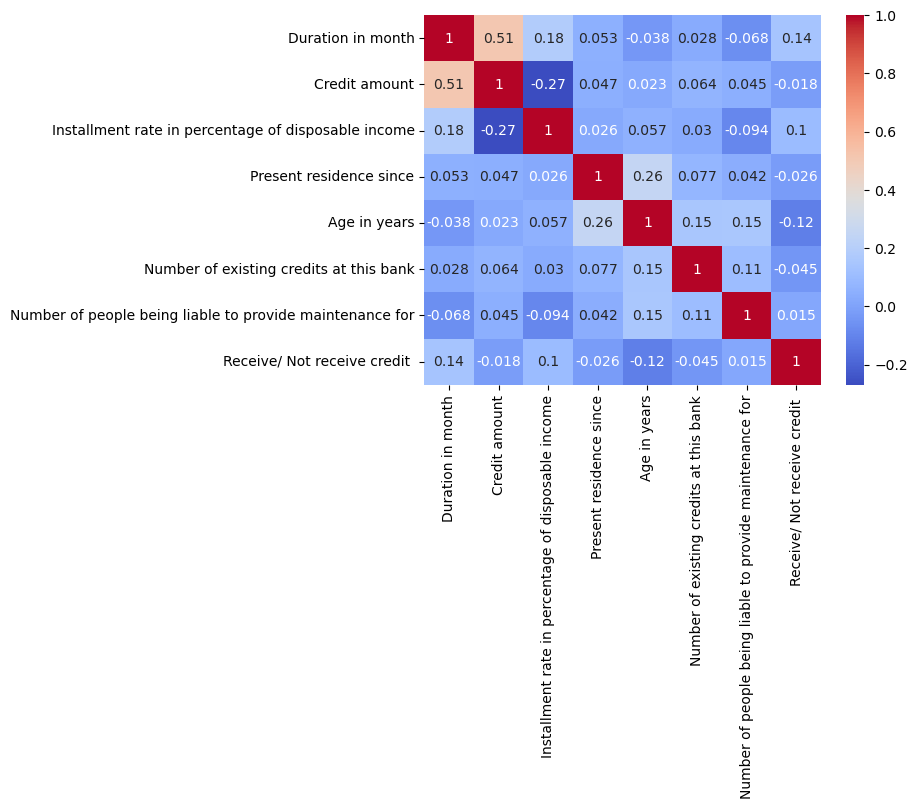

In [37]:
import numpy as np
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [39]:
numeric_df = df.select_dtypes(include=[float, int])

In [41]:
numeric_df

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Receive/ Not receive credit
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2
6,24,2835,3,4,53,1,1,1
7,36,6948,2,2,35,1,1,1
...,...,...,...,...,...,...,...,...
993,36,3959,4,3,30,1,1,1
994,12,2390,4,3,50,1,1,1
995,12,1736,3,4,31,1,1,1
996,30,3857,4,4,40,1,1,1


In [43]:
df.dtypes

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose                                                     object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since                                    object
Installment rate in percentage of disposable income          int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age in years                                                 int64
Other installment plans                                     object
Housing                                                     ob

In [45]:
df.columns = df.columns.str.strip()

In [47]:
df.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Receive/ Not receive credit'],
      dtype='object')

In [49]:
df['Receive/ Not receive credit'].value_counts()

Receive/ Not receive credit
1    634
2    228
Name: count, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Credit amount', 'Duration in month', 'Age in years']] = scaler.fit_transform(df[['Credit amount', 'Duration in month', 'Age in years']])

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define X and y
X = df.drop(columns=['Receive/ Not receive credit'])  # Drop the target column
y = df['Receive/ Not receive credit']  # Define the target variable

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)], remainder='passthrough')

# Create a pipeline that first transforms the data and then applies the model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier())])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the pipeline
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.30      0.43        70
           1       0.79      0.96      0.87       189

    accuracy                           0.78       259
   macro avg       0.77      0.63      0.65       259
weighted avg       0.78      0.78      0.75       259

Accuracy: 0.7837837837837838


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import statsmodels.api as sm

In [93]:
h11=['Status of existing checking account', 'Duration in month',
       'Credit history', 'Savings account/bonds',
       'Installment rate in percentage of disposable income']

In [95]:
df['Receive/ Not receive credit']=df['Receive/ Not receive credit'].replace(to_replace = 2, value =0) 

In [99]:
# Assuming h11 is a list of features
categorical_cols = df[h11].select_dtypes(include=['object']).columns.tolist()

# Define ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep non-categorical columns as they are
)

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2)

# Separate features and target variable
train_x = train[h11]
train_y = train['Receive/ Not receive credit']
test_x = test[h11]
test_y = test['Receive/ Not receive credit']

# Apply the transformation to the training and test sets
train_x_encoded = preprocessor.fit_transform(train_x)
test_x_encoded = preprocessor.transform(test_x)

# Scale the encoded features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_x_encoded)
X_scaled2 = scaler.transform(test_x_encoded)

# Now X_scaled and X_scaled2 are ready for modeling


In [101]:
X_scaled

array([[-0.59914469,  1.73372834, -0.25478421, ..., -0.45691567,
        -0.70609683,  0.88953886],
       [-0.59914469, -0.57679163, -0.25478421, ..., -0.45691567,
        -0.70609683,  0.88953886],
       [ 1.66904592, -0.57679163, -0.25478421, ..., -0.45691567,
        -0.00508715, -1.83442681],
       ...,
       [ 1.66904592, -0.57679163, -0.25478421, ..., -0.45691567,
        -1.40710651, -0.92643825],
       [-0.59914469, -0.57679163,  3.92489005, ..., -0.45691567,
        -0.70609683, -0.92643825],
       [ 1.66904592, -0.57679163, -0.25478421, ..., -0.45691567,
        -1.40710651, -0.01844969]])

In [103]:
X_scaled2

array([[-0.59914469, -0.57679163, -0.25478421, ...,  2.18858766,
         0.69592253, -0.01844969],
       [-0.59914469, -0.57679163, -0.25478421, ..., -0.45691567,
         0.69592253,  0.88953886],
       [ 1.66904592, -0.57679163, -0.25478421, ..., -0.45691567,
        -0.93976673, -1.83442681],
       ...,
       [-0.59914469, -0.57679163, -0.25478421, ...,  2.18858766,
        -0.70609683,  0.88953886],
       [-0.59914469, -0.57679163,  3.92489005, ..., -0.45691567,
         1.39693221,  0.88953886],
       [-0.59914469,  1.73372834, -0.25478421, ..., -0.45691567,
        -0.47242694, -1.83442681]])

In [111]:
# Assume df is your DataFrame and 'Receive/ Not receive credit' is the target column
X = df.drop(columns=['Receive/ Not receive credit'])  # Feature matrix
y = df['Receive/ Not receive credit']  # Target variable

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],remainder='passthrough')

# Transform the features
X_encoded = preprocessor.fit_transform(X)

# Convert X_encoded to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=preprocessor.get_feature_names_out(), index=X.index)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.3, random_state=42, stratify=y)

# Align indices of y_train and X_train
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the model summary
print(result.summary2())


         Current function value: 0.394781
         Iterations: 35
                                                           Results: Logit
Model:                                  Logit                                         Method:                             MLE       
Dependent Variable:                     Receive/ Not receive credit                   Pseudo R-squared:                   0.316     
Date:                                   2024-08-12 12:24                              AIC:                                574.1062  
No. Observations:                       603                                           BIC:                                789.8001  
Df Model:                               48                                            Log-Likelihood:                     -238.05   
Df Residuals:                           554                                           LL-Null:                            -347.85   
Converged:                              0.0000                

C:\Users\HP\.anaconda\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming h11 is the list of features including categorical and numerical columns
categorical_cols = df[h11].select_dtypes(include=['object']).columns.tolist()

# Define a ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Apply the transformation to both train and test data
X_encoded = preprocessor.fit_transform(df[h11])

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X_encoded, df['Receive/ Not receive credit'], test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_x)
X_scaled2 = scaler.transform(test_x)
model = LogisticRegression(penalty='l2', C=0.1, class_weight= "balanced")


# fit the model with the training data

model.fit(X_scaled,train_y)

## coefficeints of the trained model
print('Coefficient of model :', model.coef_)
#
## intercept of the model
print('Intercept of model',model.intercept_)

# predict the target on the train dataset
predict_train = model.predict(train_x)
#print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_scaled2)
#print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y,predict_test)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(test_y,predict_test))

Coefficient of model : [[-0.41220492 -0.22100446  0.00084696  0.57245104 -0.1156956  -0.25160519
  -0.03092211 -0.07224988  0.23257295 -0.16874965 -0.01080701 -0.02789966
   0.14443648  0.15576632 -0.3557308  -0.24389266]]
Intercept of model [0.36104155]
accuracy_score on train dataset :  0.5297532656023222
accuracy_score on test dataset :  0.6763005780346821
[[31 19]
 [37 86]]
              precision    recall  f1-score   support

           0       0.46      0.62      0.53        50
           1       0.82      0.70      0.75       123

    accuracy                           0.68       173
   macro avg       0.64      0.66      0.64       173
weighted avg       0.71      0.68      0.69       173



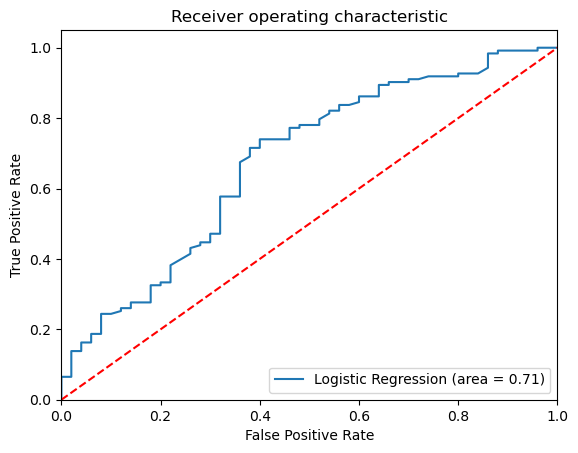

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, model.predict(X_scaled2))
fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(X_scaled2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = 0.71)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Example DataFrame and target column
df = pd.DataFrame({
    'Feature1': ['A', 'B', 'C', 'A', 'B', 'C'],
    'Feature2': [1, 2, 3, 4, 5, 6],
    'Receive/Not receive credit': [1, 0, 1, 0, 1, 0]
})

# Features and target
X = df.drop(columns=['Receive/Not receive credit'])
y = df['Receive/Not receive credit']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Transform the features
X_encoded = preprocessor.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=preprocessor.get_feature_names_out(), index=X.index)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42, stratify=y)

# Ensure n_neighbors is less than or equal to the number of training samples
knn_model = KNeighborsClassifier(n_neighbors=min(5, len(X_train)))
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

KNN Accuracy: 0.5


C:\Users\HP\.anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\.anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\.anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
